<a href="https://colab.research.google.com/github/sainathnallagonda/Walmart---Confidence-Interval-and-CLT/blob/main/Walmart_Confidence_Interval_and_CLT(Sainath).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

Importing all the packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df=pd.read_csv('walmart_data.csv?1641285094')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


This data contains no missing values

In [ ]:
columns = ['Occupation','Marital_Status','Product_Category']
df[columns] = df[columns].astype('object')
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,object
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,object
Product_Category,object
Purchase,int64


Changing datatype int64 to object

In [ ]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [ ]:
categorical_cols = ['Gender', 'Age', 'Stay_In_Current_City_Years', 'Marital_Status','City_Category']
df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()*100/len(df)

value
variable                   value           
Age                        0-17    2.745479
                           18-25  18.117760
                           26-35  39.919974
                           36-45  19.999891
                           46-50   8.308246
                           51-55   6.999316
                           55+     3.909335
City_Category              A      26.854862
                           B      42.026259
                           C      31.118880
Gender                     F      24.689493
                           M      75.310507
Marital_Status             0      59.034701
                           1      40.965299
Stay_In_Current_City_Years 0      13.525237
                           1      35.235825
                           2      18.513711
                           3      17.322404
                           4+     15.402823


*   75% of users are male and 25% are female.
*   Users ages 26–35 are 40%, users ages 36–45 are 20%, users ages 18–25 are 18%,and very low users ages ( 0–17 & 55+ )are 5%.
*  60% of users are single, and 40% are married.


**Visual Analysis - Univariate & Bivariate**

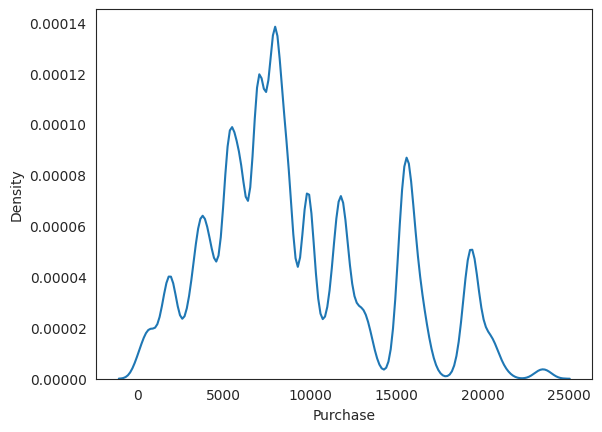

In [ ]:
sns.kdeplot(data=df, x='Purchase')
plt.show()

Majority of purchases lie between 5000 to 9000 units


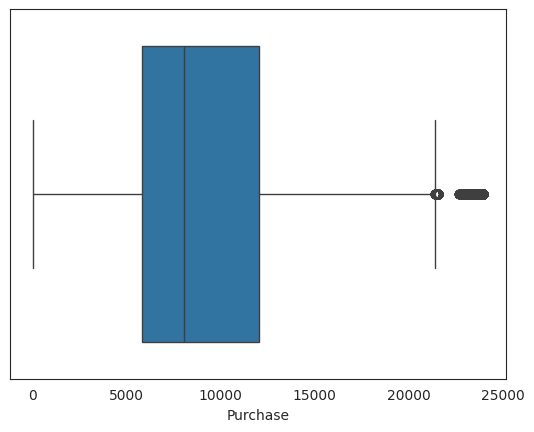

In [ ]:
sns.boxplot(data=df, x='Purchase')
plt.show()

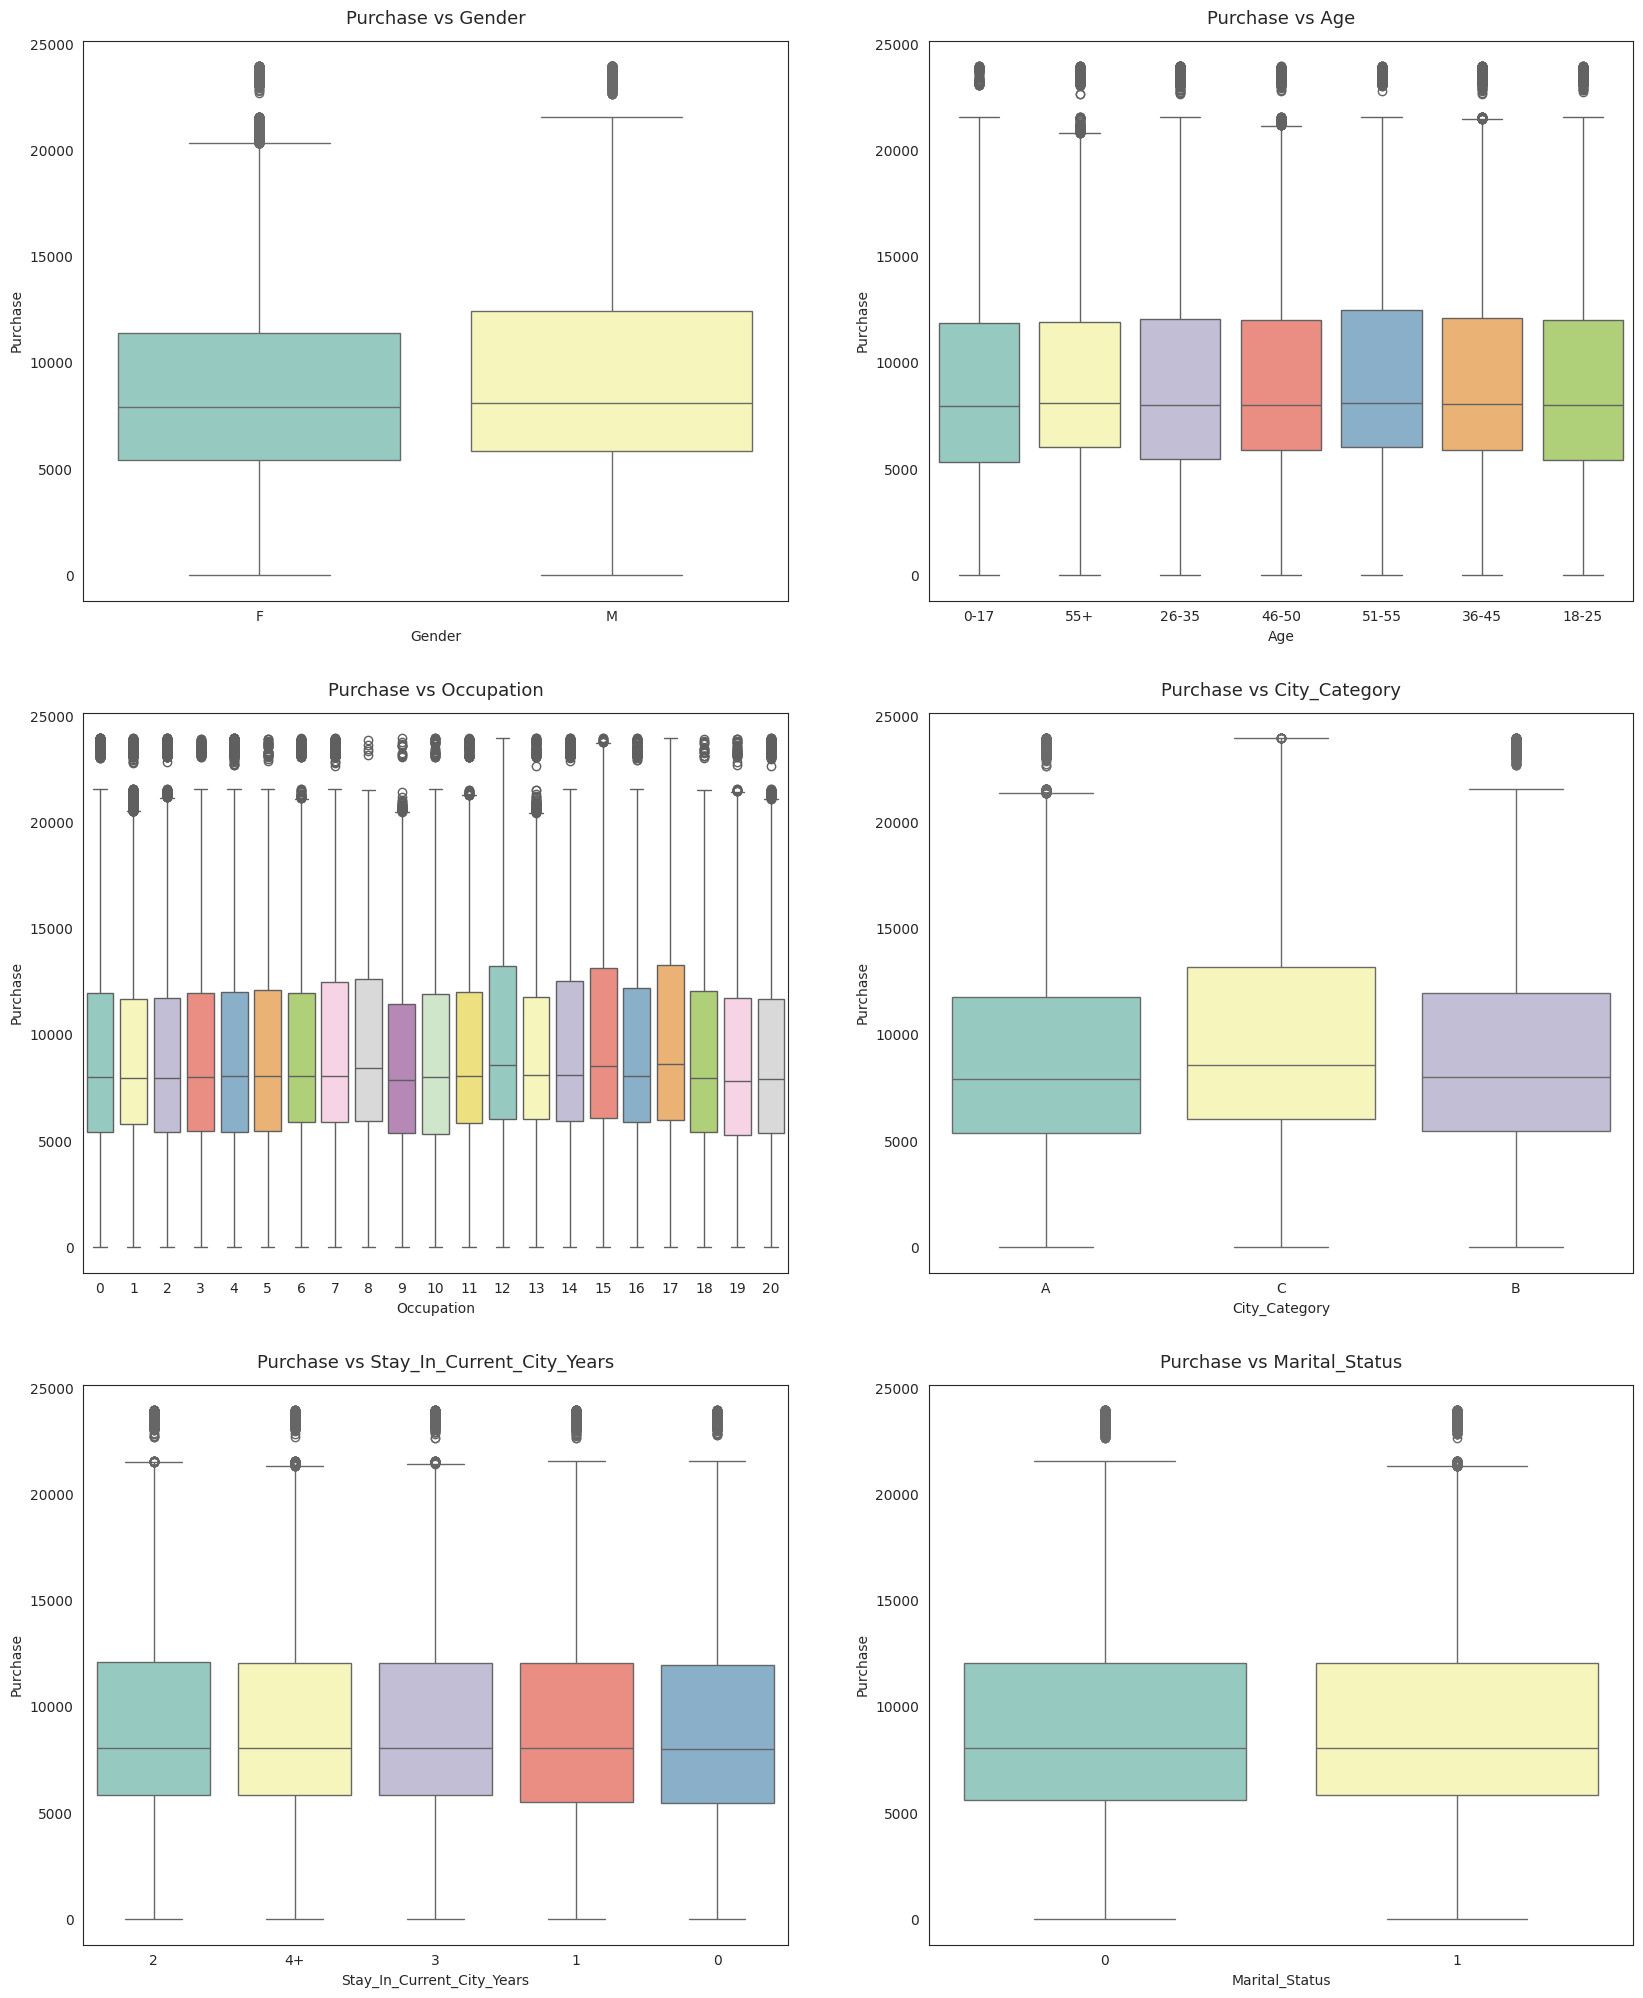

In [ ]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], hue=attrs[count], ax=axs[row, col], palette='Set3', legend=False)
        axs[row, col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

In [ ]:
q1=df.Purchase.quantile(0.25)
q3=df.Purchase.quantile(0.75)
print(q1,q3)
IQR=q3-q1
outliers = df[((df.Purchase<(q1-1.5*IQR)) | (df.Purchase>(q3+1.5*IQR)))]
print("num outliers : ",len(outliers))
print("percent outliers : ",len(outliers)/len(df))

5823.0 12054.0
num outliers :  2677
percent outliers :  0.004866671029763593


In [ ]:
df_clean=df.drop(df[ (df.Purchase > (q3+1.5*IQR)) | (df.Purchase < (q1-1.5*IQR)) ].index)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547391 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     547391 non-null  int64 
 1   Product_ID                  547391 non-null  object
 2   Gender                      547391 non-null  object
 3   Age                         547391 non-null  object
 4   Occupation                  547391 non-null  object
 5   City_Category               547391 non-null  object
 6   Stay_In_Current_City_Years  547391 non-null  object
 7   Marital_Status              547391 non-null  object
 8   Product_Category            547391 non-null  object
 9   Purchase                    547391 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 45.9+ MB


In [ ]:
staying=df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
stay.index

Index(['1', '2', '3', '4+', '0'], dtype='object', name='Stay_In_Current_City_Years')

In [ ]:
staying.replace(to_replace='4+',value=4,inplace=True)

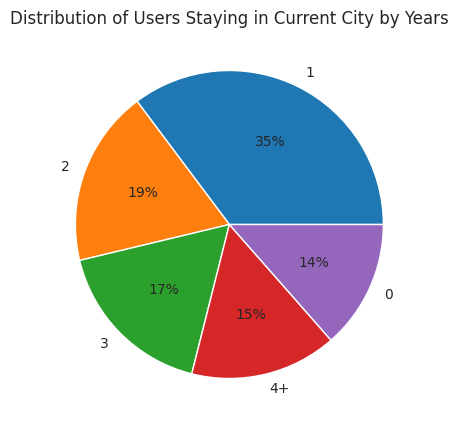

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(x=staying.values,labels=stay.index,autopct='%.0f%%')
plt.title('Distribution of Users Staying in Current City by Years')
plt.show()

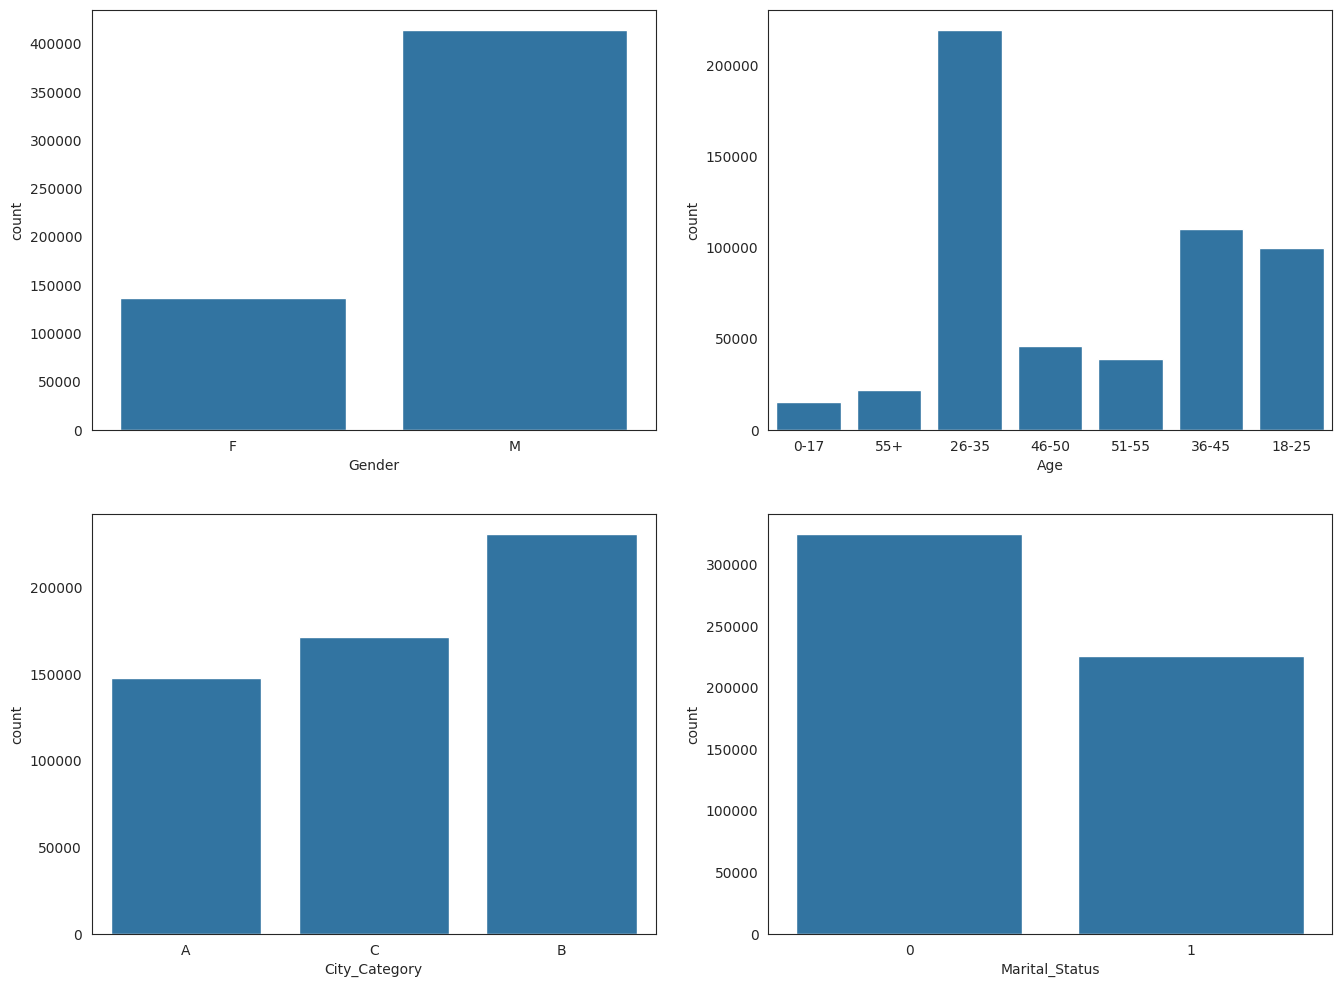

In [ ]:

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Age', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()


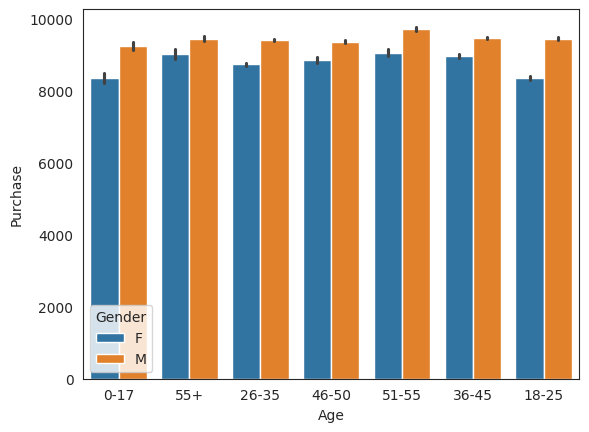

In [ ]:
sns.barplot(data=df, x='Age', y='Purchase',hue="Gender")
plt.show()

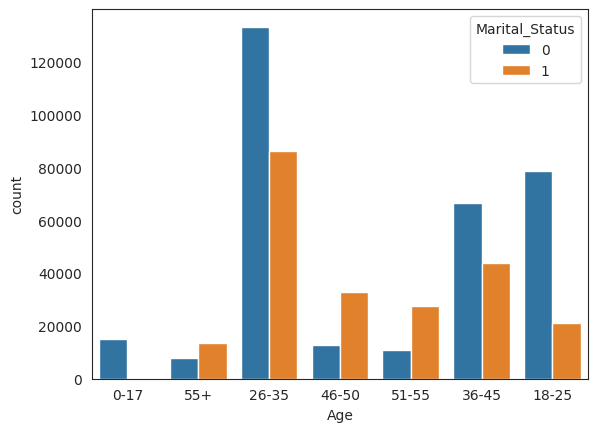

In [ ]:
sns.countplot(data=df, x='Age',hue='Marital_Status')
plt.show()

*  as expected 0-17 no married

*  till 45 number of unmarried people are more than married

*  after 45 number of married are more



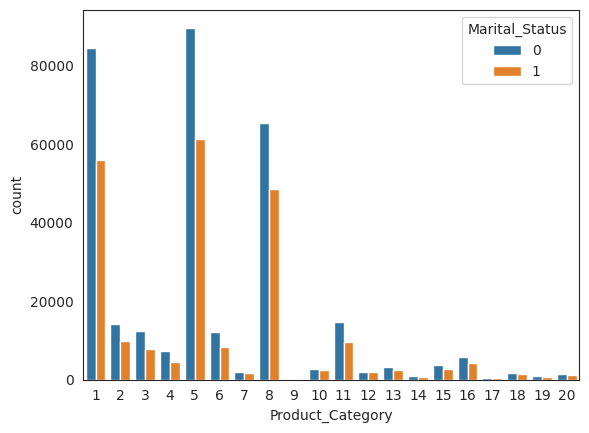

In [ ]:
sns.countplot(data=df, x='Product_Category',hue='Marital_Status')
plt.show()

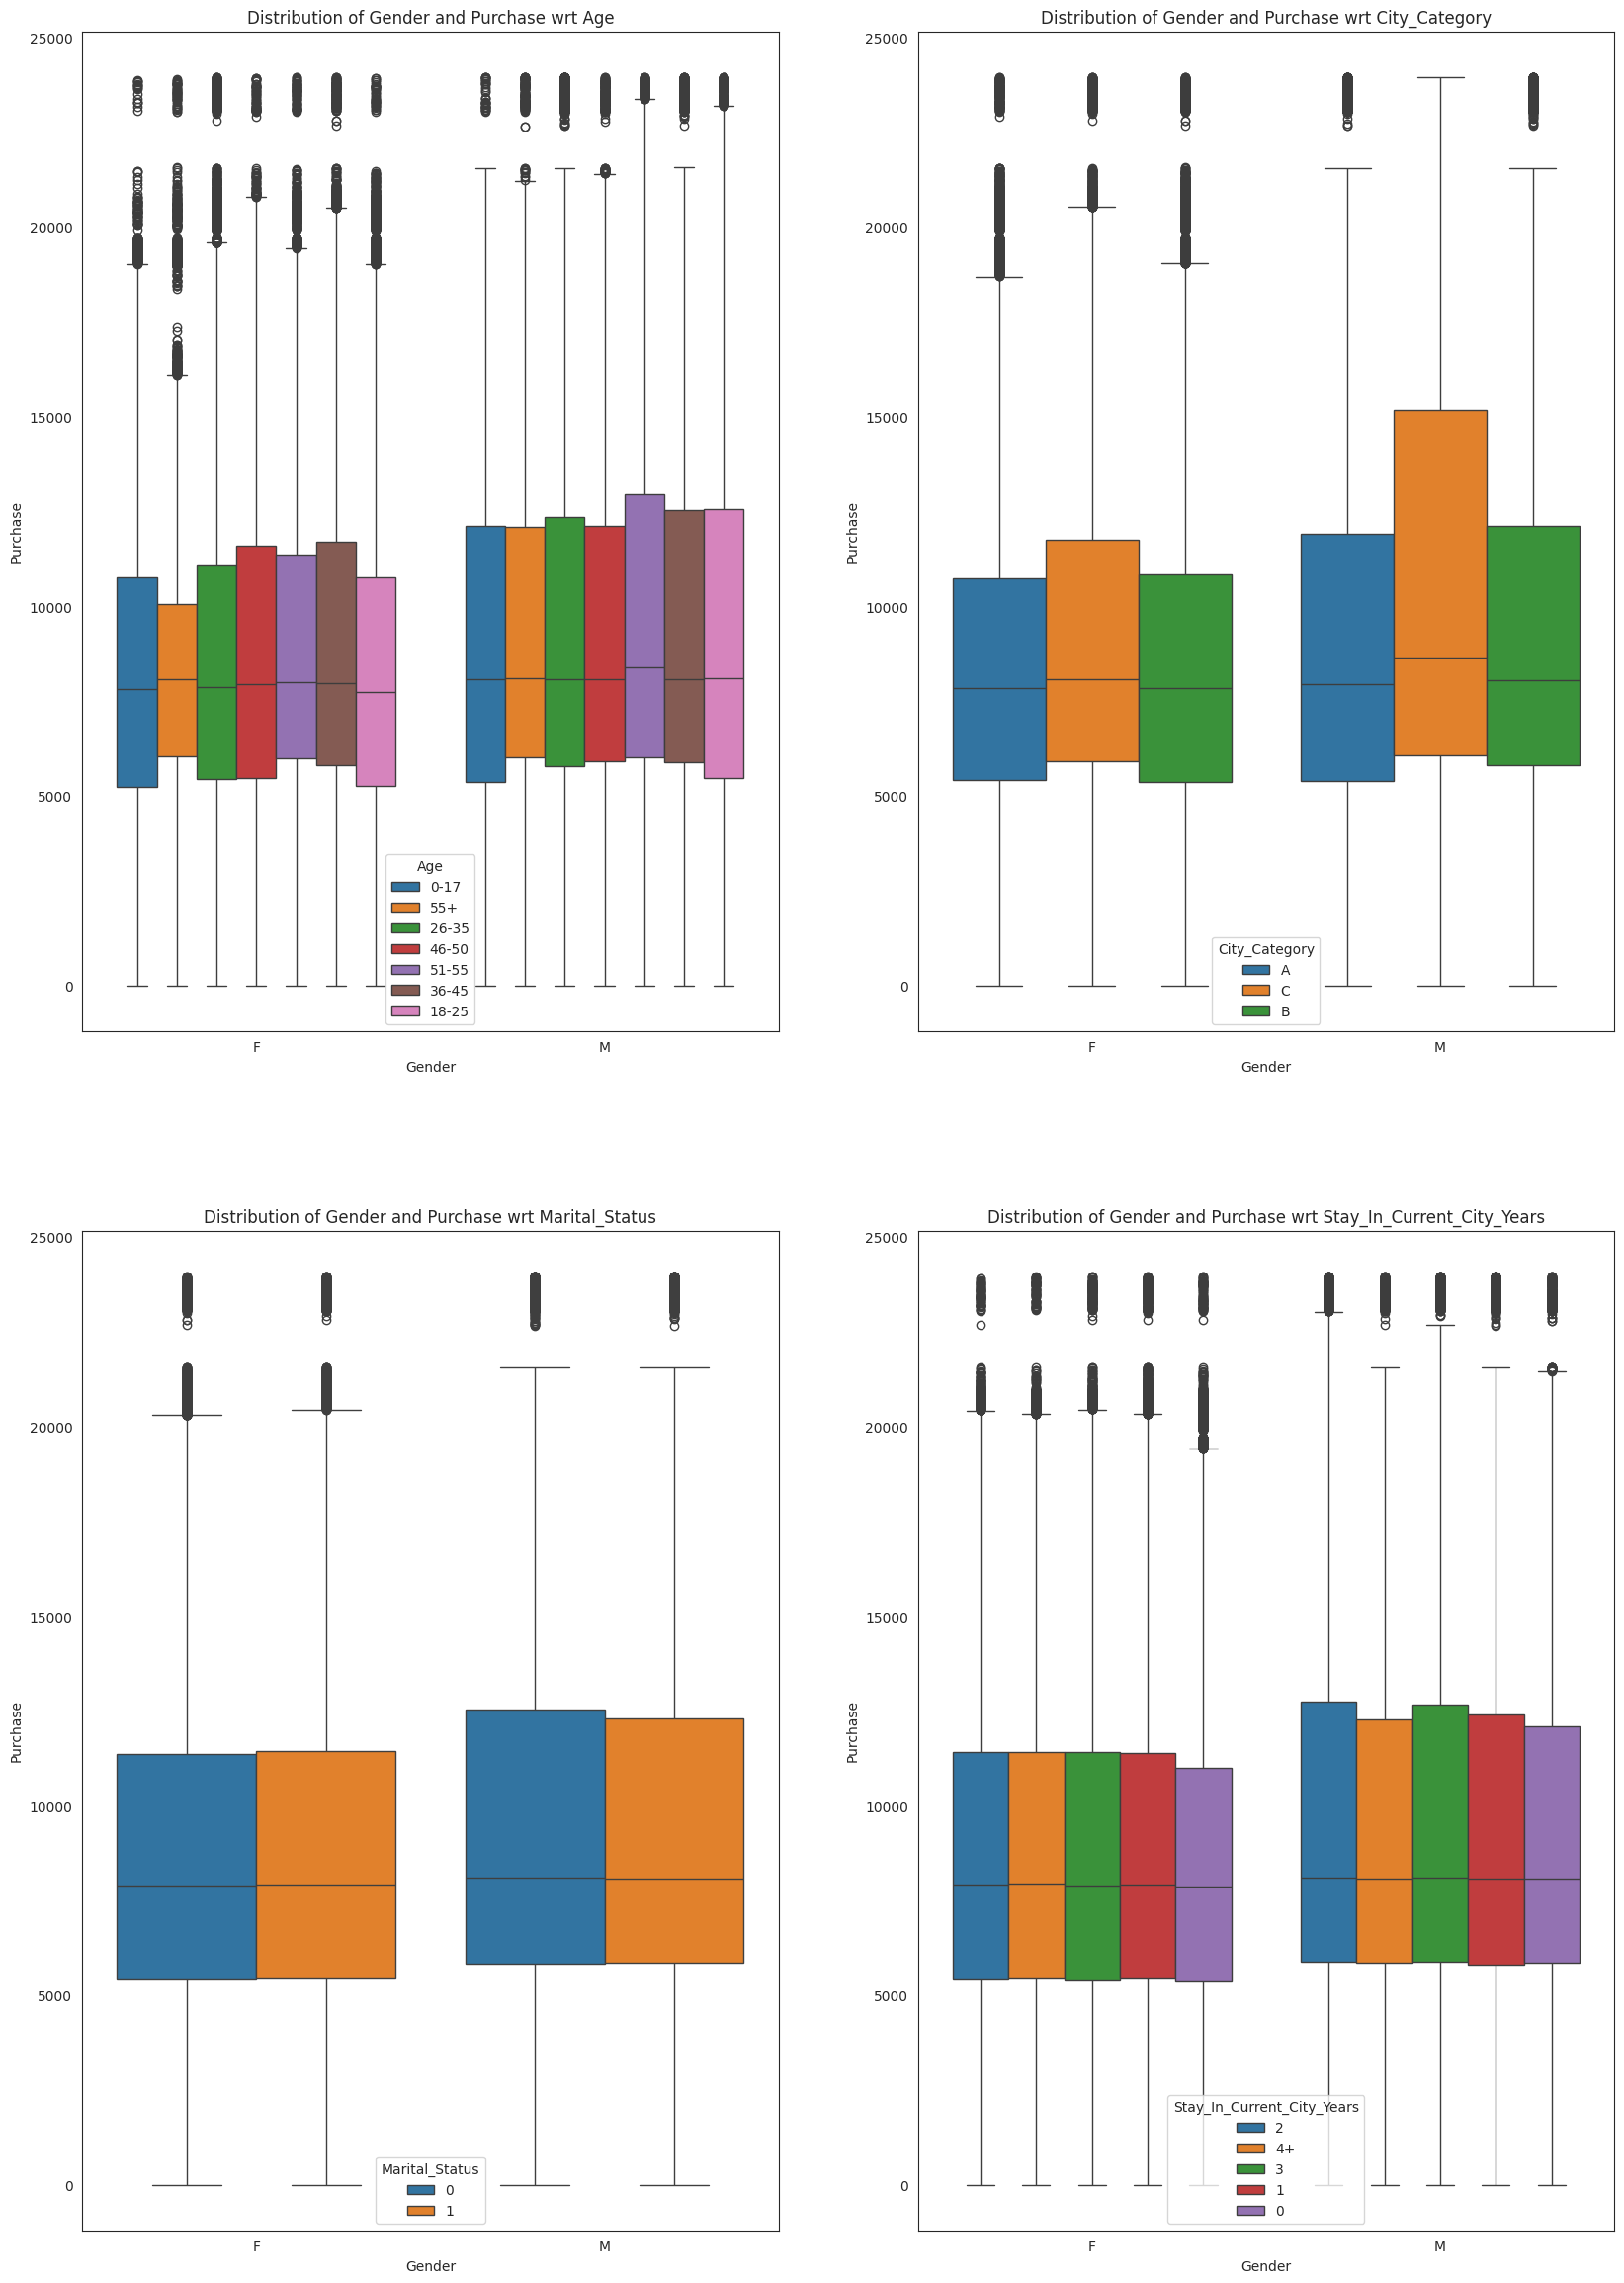

In [ ]:
attr1=['Age','City_Category','Marital_Status','Stay_In_Current_City_Years']
fig, ax=plt.subplots(2,2,figsize=(20,16))
fig.subplots_adjust(top=1.5)
idx=0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=df,x='Gender',y='Purchase',hue=attr1[idx],ax=ax[i,j])
        ax[i,j].set_title(f'Distribution of Gender and Purchase wrt {attr1[idx]}')
        idx+=1
plt.show()

*  Male cutomers purchase more than the females, among males 51-55 age group average purchase value is high compared to others.

*  Males from City category A have high purchase value compared to other categories where females from category A has low purchase values.


In [ ]:
user_amt=df.groupby(['User_ID','Gender'])[['Purchase']].sum().reset_index()
user_amt.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


In [ ]:
Female_data = df[df["Gender"]=="F"]
print("Female Purchase amount Mean:"+ str(Female_data["Purchase"].mean()))

Female Purchase amount Mean:8734.565765155476


In [ ]:
Male_data = df[df["Gender"]=="M"]
print("Female Purchase amount Mean:"+ str(Male_data["Purchase"].mean()))

Female Purchase amount Mean:9437.526040472265


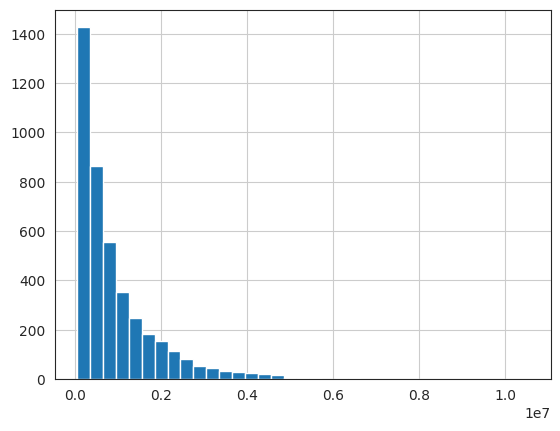

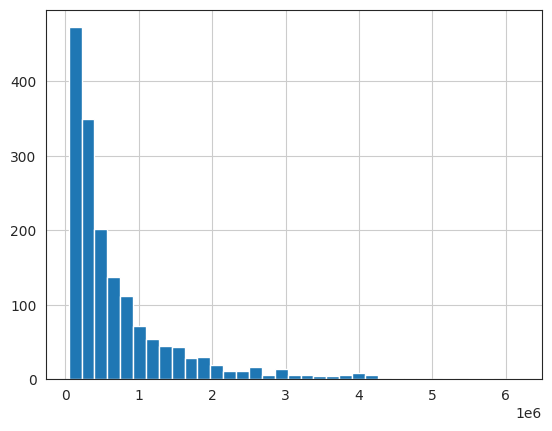

In [ ]:
user_amt[user_amt['Gender']=='M']['Purchase'].hist(bins=35)
plt.show()
user_amt[user_amt['Gender']=='F']['Purchase'].hist(bins=35)
plt.show()

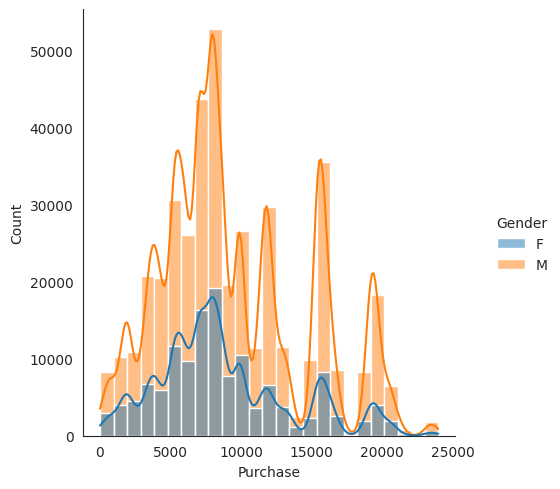

In [ ]:
sns.displot(x='Purchase', bins=25, kde=True,hue='Gender', data=df )

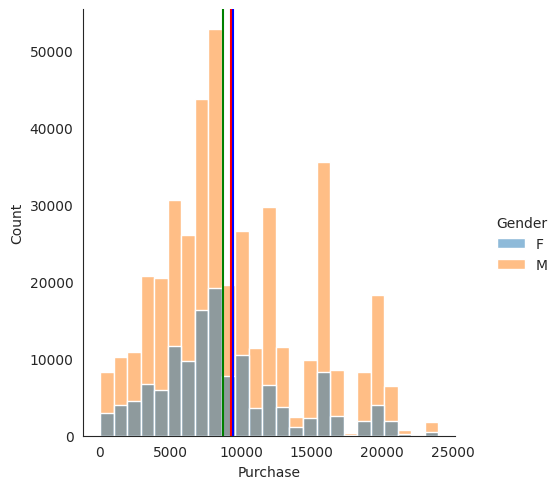

In [ ]:
sns.displot(x='Purchase', data=df, bins=25, hue='Gender')

plt.axvline(x=df['Purchase'].mean(), color='r')
plt.axvline(x=df[df['Gender']=='M']['Purchase'].mean(), color='b')
plt.axvline(x=df[df['Gender']=='F']['Purchase'].mean(), color='g')

plt.show()

In [ ]:
users_purchase=user_amt['Purchase']
users_purchase_avg=users_purchase.mean()
print("Average amount spend by a user on black friday is {:.2f}".format(users_purchase_avg))

Average amount spend by a user on black friday is 865016.59


In [ ]:
male_user_mean=user_amt[user_amt['Gender']=='M']['Purchase'].mean()
female_user_mean=user_amt[user_amt['Gender']=='F']['Purchase'].mean()
print("Average amount spend by male user on black friday is {:.2f}".format(male_user_mean))
print('Average amount spend by female user on black friday is {:.2f}'.format(female_user_mean))

Average amount spend by male user on black friday is 925344.40
Average amount spend by female user on black friday is 712024.39


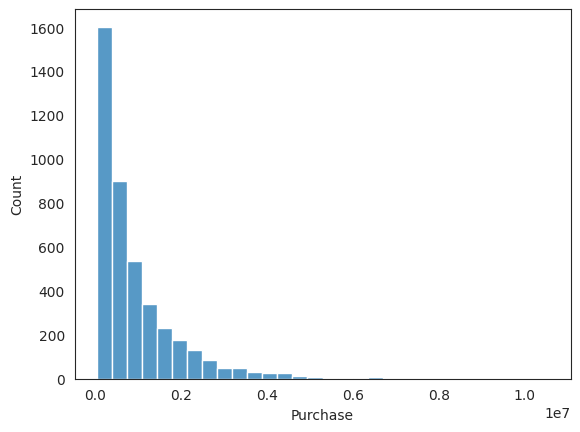

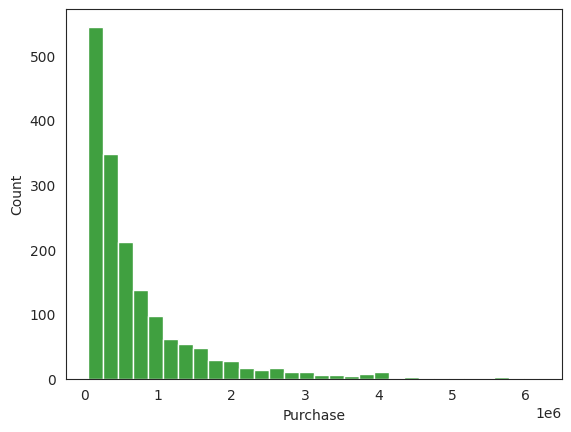

In [ ]:
sns.histplot(data=user_amt[user_amt['Gender']=='M']['Purchase'],bins=30)
plt.show()
sns.histplot(data=user_amt[user_amt['Gender']=='F']['Purchase'],bins=30,color='g')
plt.show()

**Applying Central Limit Theorem**

In [ ]:
sample_users_mean_1600 = [np.mean(users_purchase.sample(1600)) for i in range(10000)]


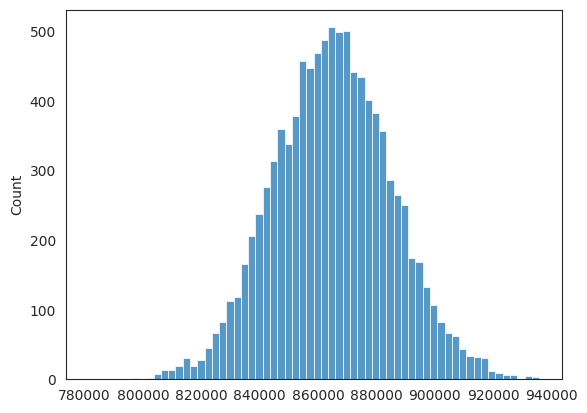

In [ ]:
sns.histplot(data=sample_users_mean_1600)
plt.show()

In [ ]:
mean = np.mean(sample_users_mean_1600)
std = np.std(sample_users_mean_1600)
mean, std

(865003.911826, 20183.55038176947)

In [ ]:
male_user_purchase=user_amt[user_amt['Gender']=='M']['Purchase']
female_user_purchase=user_amt[user_amt['Gender']=='F']['Purchase']

In [ ]:
print(np.mean(male_sample_avg_1250),np.std(male_sample_avg_1250))
print(np.mean(female_sample_avg_500),np.std(female_sample_avg_500))

925326.51592888 23488.22793950574
711923.6298098 30301.625874019


Mean of sample means of male user purchase is 925813.45 and standard deviation is 23678.34.

Mean of sample means of female user purchase is 712173.78 and standard deviation is 30194.74

In [ ]:
marital_user_amt=df.groupby(['User_ID','Marital_Status'])[['Purchase']].sum().reset_index()
marital_user_amt


,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [ ]:
marital_user_amt['Marital_Status'].value_counts()



,count
Marital_Status,
0,3417
1,2474


In [ ]:
single_user_purchase=marital_user_amt[marital_user_amt['Marital_Status']==0]['Purchase']
married_user_purchase=marital_user_amt[marital_user_amt['Marital_Status']==1]['Purchase']

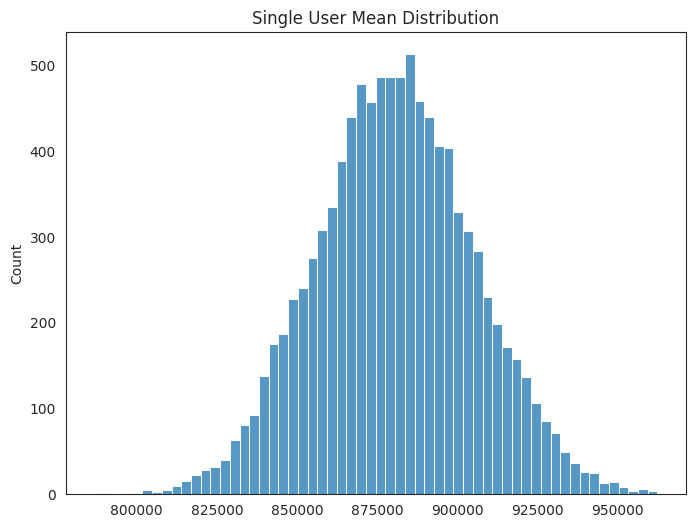

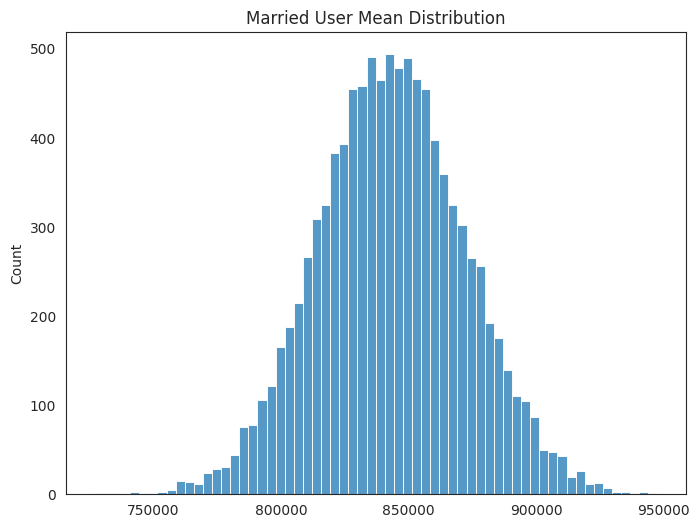

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=single_user_mean_1025)
plt.title('Single User Mean Distribution')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(data=married_user_mean_750)
plt.title('Married User Mean Distribution')
plt.show()

In [ ]:
single_user_purchase_mean=np.mean(single_user_purchase)
single_user_std=np.std(single_user_purchase)

married_user_purchase_mean=np.mean(married_user_purchase)
married_user_std=np.std(married_user_purchase)

In [ ]:
single_user_mean_1025=[np.mean(single_user_purchase.sample(1025)) for i in range(10000)]
married_user_mean_750=[np.mean(married_user_purchase.sample(750)) for i in range(10000)]

In [ ]:
print(np.mean(single_user_mean_1025),np.std(single_user_mean_1025))
print(np.mean(married_user_mean_750),np.std(married_user_mean_750))

880380.0800526829 24989.30233743166
843047.9198989334 28430.455321953097


Mean of sample means of single user purchase is 880476.87 and standard deviation is 24458.52.

Mean of sample means of married user purchase is 843421.14 and standard deviation is 28397.85

In [ ]:
single_sample_lower_lim=np.mean(single_user_mean_1025) - 1.96*((single_user_std)/np.sqrt(1025))
single_sample_upper_lim=np.mean(single_user_mean_1025) + 1.96*((single_user_std)/np.sqrt(1025))

married_sample_lower_lim=np.mean(married_user_mean_750) - 1.96*((married_user_std)/np.sqrt(750))
married_sample_upper_lim=np.mean(married_user_mean_750) + 1.96*((married_user_std)/np.sqrt(750))

print("Single User purchase 95% confidence interval of means lie in range acc to CLT is: ({:.2f}, {:.2f})".format(single_sample_lower_lim, single_sample_upper_lim))
print("Married User purchase 95% confidence interval of means lie in range acc to CLT is: ({:.2f}, {:.2f})".format(married_sample_lower_lim, married_sample_upper_lim))

Single User purchase 95% confidence interval of means lie in range acc to CLT is: (822263.99, 938496.17)
Married User purchase 95% confidence interval of means lie in range acc to CLT is: (776119.16, 909976.68)


In [ ]:
age_user_amt=df.groupby(['User_ID','Age'])[['Purchase']].sum().reset_index()
age_user_amt

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [ ]:
age_user_amt['Age'].value_counts()


,count
Age,
26-35,2053
36-45,1167
18-25,1069
46-50,531
51-55,481
55+,372
0-17,218


In [ ]:
sample_size = 250
num_repitions = 1500
all_age_means={}
all_age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in all_age_intervals:
    all_age_means[i] = []

for i in all_age_intervals:
    for _ in range(num_repitions):
        mean = age_user_amt[age_user_amt['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_age_means[i].append(mean)

In [ ]:
for i in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    age_purchase=age_user_amt[age_user_amt['Age']==i]

    Age_sample_lower_lim=np.mean(age_purchase['Purchase']) - 1.96*((np.std(age_purchase['Purchase']))/np.sqrt(250))
    Age_sample_upper_lim=np.mean(age_purchase['Purchase']) + 1.96*((np.std(age_purchase['Purchase']))/np.sqrt(250))

    print("For age {} confidence interval of means lie in the range of: ({:.2f}, {:.2f})".format(i, Age_sample_lower_lim, Age_sample_upper_lim))

For age 26-35 confidence interval of means lie in the range of: (861810.75, 1117507.88)
For age 36-45 confidence interval of means lie in the range of: (758039.89, 1001291.53)
For age 18-25 confidence interval of means lie in the range of: (744842.29, 964883.95)
For age 46-50 confidence interval of means lie in the range of: (677460.22, 907637.34)
For age 51-55 confidence interval of means lie in the range of: (665085.79, 861316.06)
For age 55+ confidence interval of means lie in the range of: (463256.72, 616137.77)
For age 0-17 confidence interval of means lie in the range of: (533894.96, 703840.67)


**Insights**
*  Around ~85% of customer transactions belongs to the ages between 18 to 50.

* There are three city categories where larger share of transactions is from city category C i.e 42%.
where most unique users belongs to B

* 75% of users are male customers who purchased on black friday.

* 60% are Single users, 40% are married users.

* There are 20 different occupation categories, highest no of users belong to 4 occupation category i.e. 13%.

* Most no of users purchased the products which belong to 5 product category i.e 27%.

**Recommendations**

* Men spent more money than women, So company should focus on retaining the male
customers and getting more male customers.
* Single Martial Status users spent more, so having unique combos of products can help.
*Company should do reserch on products which are intreseted by age groups of 18-50.
*Male customers living in City_Category C spend more money than other male customers
living in B or C, Selling more products in the City_Category C will help the company
increase the revenue.